# Arabica Coffee Exploration

## Introduction

### Background

In the past few years, I have become more interested in coffee. I have thought about how Q-grade affect the price of coffee. However, a more foundational questions deals with how a coffee will score first before it is priced. A Q-grader evaluates the coffee during a process called cupping. The cupping process allows the grader to compare different coffees together. They brew each coffee with the same amount of coffee and water. Specialty Coffee Assocation (SCA) provides the [protocols](https://sca.coffee/research/protocols-best-practices) for cupping an evaluating coffee. Coffees are graded on "Fragrance/Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness, Defects, and Overall" (Source: SCA). The graders assign a number between 6-10 using quarter point incriments.  

### Data Source
This data comes from James LeDoux [GitHub](https://github.com/jldbc/coffee-quality-database/tree/master/data) repositiary. He scrapped the data from Coffee Quality Institue [database](https://database.coffeeinstitute.org/) in January 2018. He has both the scrapped data and the clean data. I have choosen to use the clean data.

## Data Scoping

I want to discover the connection between cupping score and alititude and also look at variety and cupping score. Here is the order of questions to discover or connect.

1. Compare `Total.Cup.Points` with `variety`

2. Compare `Total.Cup.Points` with `altitude_mean_meters`

3. Determine if `altitude_mean_meters` and `variety` effect `Total.Cup.Points`.

### Import Python Modules

To start the analysis, I am going to load Pandas, Matplotlib, and Seaborn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the Data

In [2]:
coffee_df = pd.read_csv("arabica_data_cleaned.csv")
print(coffee_df.shape)

(1311, 44)


Since there are 44 different columns, the next step will reduce the dataframe to the columns that will be required.

In [3]:
coffee_edit_df = coffee_df[["Species", "Variety", "Total.Cup.Points", "altitude_mean_meters", "unit_of_measurement"]].copy()
print(coffee_edit_df.shape)

(1311, 5)


In [4]:
print(coffee_edit_df.describe(include="all"))

        Species  Variety  Total.Cup.Points  altitude_mean_meters  \
count      1311     1110       1311.000000           1084.000000   
unique        1       29               NaN                   NaN   
top     Arabica  Caturra               NaN                   NaN   
freq       1311      256               NaN                   NaN   
mean        NaN      NaN         82.115927           1784.196379   
std         NaN      NaN          3.515761           8767.016913   
min         NaN      NaN          0.000000              1.000000   
25%         NaN      NaN         81.170000           1100.000000   
50%         NaN      NaN         82.500000           1310.640000   
75%         NaN      NaN         83.670000           1600.000000   
max         NaN      NaN         90.580000         190164.000000   

       unit_of_measurement  
count                 1311  
unique                   2  
top                      m  
freq                  1129  
mean                   NaN  
std      

In [5]:
print(coffee_edit_df.isna().sum())

Species                   0
Variety                 201
Total.Cup.Points          0
altitude_mean_meters    227
unit_of_measurement       0
dtype: int64


In [6]:
grade_variety = coffee_edit_df[['Variety', 'Total.Cup.Points']].copy()
grade_variety.Variety = grade_variety.Variety.fillna('Unknow')
grade_variety['count_variety'] = grade_variety.groupby(["Variety"]).transform('nunique')
grade_df = grade_variety[grade_variety.count_variety >= 10]
grouped_grade_variety = grade_df.loc[:,['Variety', 'Total.Cup.Points']].groupby('Variety').median().sort_values(by='Total.Cup.Points', ascending=False)
print(grade_df)

      Variety  Total.Cup.Points  count_variety
0      Unknow             90.58             96
1       Other             89.92             66
2     Bourbon             89.75             85
3      Unknow             89.00             96
4       Other             88.83             66
...       ...               ...            ...
1306  Bourbon             68.33             85
1307   Typica             67.92             96
1308  Caturra             63.08             83
1309   Catuai             59.83             44
1310  Caturra              0.00             83

[1265 rows x 3 columns]


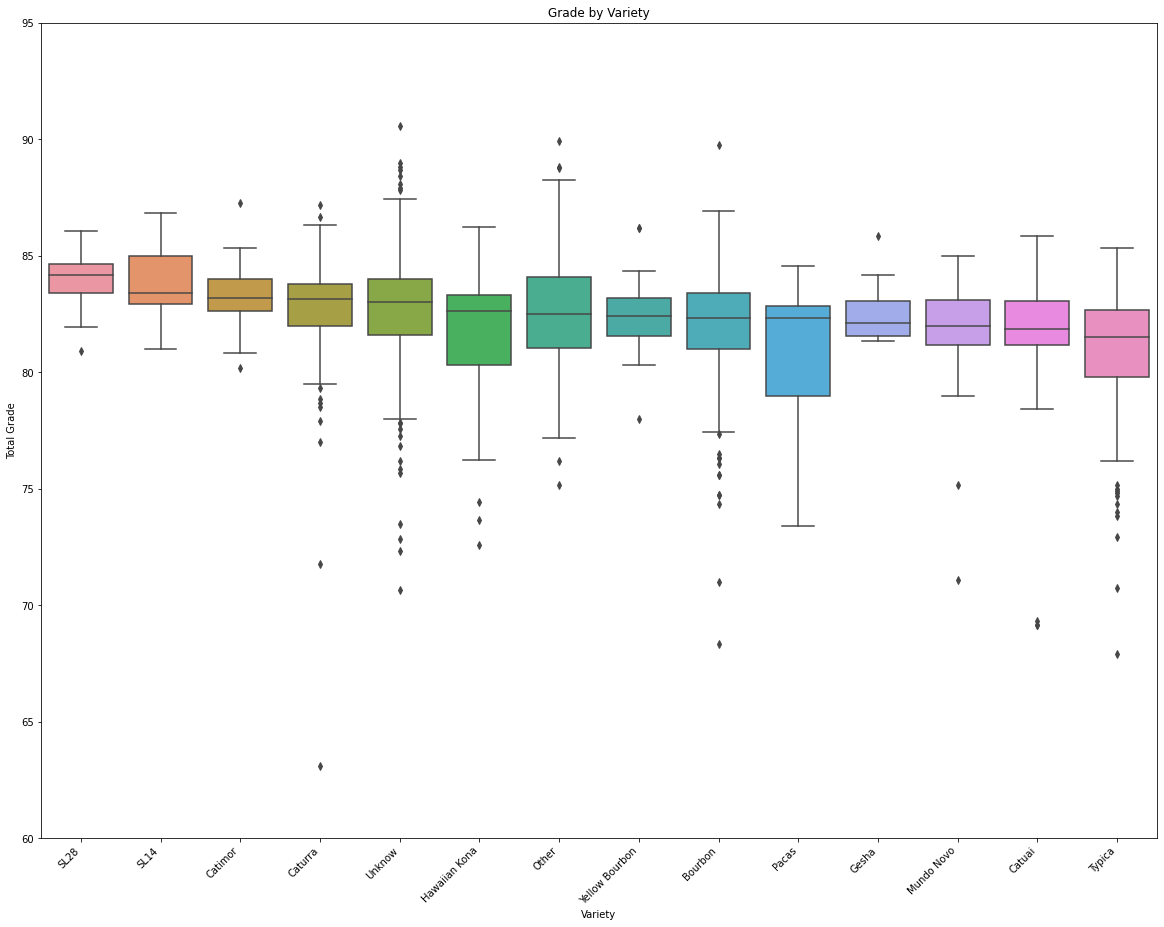

In [7]:
plt.figure(figsize=[20,15], facecolor='white')
sns.boxplot(x='Variety', y='Total.Cup.Points',data=grade_df, order=grouped_grade_variety.index)
plt.title('Grade by Variety')
plt.xlabel('Variety')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Total Grade')
plt.ylim(60, 95)
plt.savefig('grade_by_variety.png')